## Probabilistic Learning on Manifolds (Simple example in 20 dimensions)

In this example, raw invented data is used as sample input. This is just a user guide to see how the package and algorithm work and see their possible applications.

The input sample included 300 data points and each features a unique vector of some independent variables and some other linearly related variables. The goal is to use PLoM learn the data structure and generate more samples whose key statistics (i.e., mean and covariance) are consistent with the input sample.

### Import python modules

In [1]:
import numpy as np
import random
import time
from math import pi
import pandas as pd
from ctypes import *
%matplotlib notebook
import matplotlib.pyplot as plt
import sys

### Import PLoM modules

In [2]:
sys.path.insert(1, '../../')
from PLoM import *

### Load Data
Data are loaded via a comma-separate value (csv) file. The first row contains column names for all the variables. The following rows are input sample data. Users are expected to specif the csv filename.

2021-10-20 01:12:11.068953  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-10-20 01:12:11.069588  RUNNING-MSG PLoM: Running directory /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints initialized. 
2021-10-20 01:12:11.086863  RUNNING-MSG PLoM: database server initialized. 
2021-10-20 01:12:11.087621  RUNNING-MSG PLoM: visualization folder /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut initialized. 
2021-10-20 01:12:11.095092  RUNNING-MSG PLoM.load_data: loaded data size = (300, 20). 
2021-10-20 01:12:11.127080  RUNNING-MSG PLoM.initialize_data: current X0 size = (300, 20). 
2021-10-20 01:12:11.127550  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


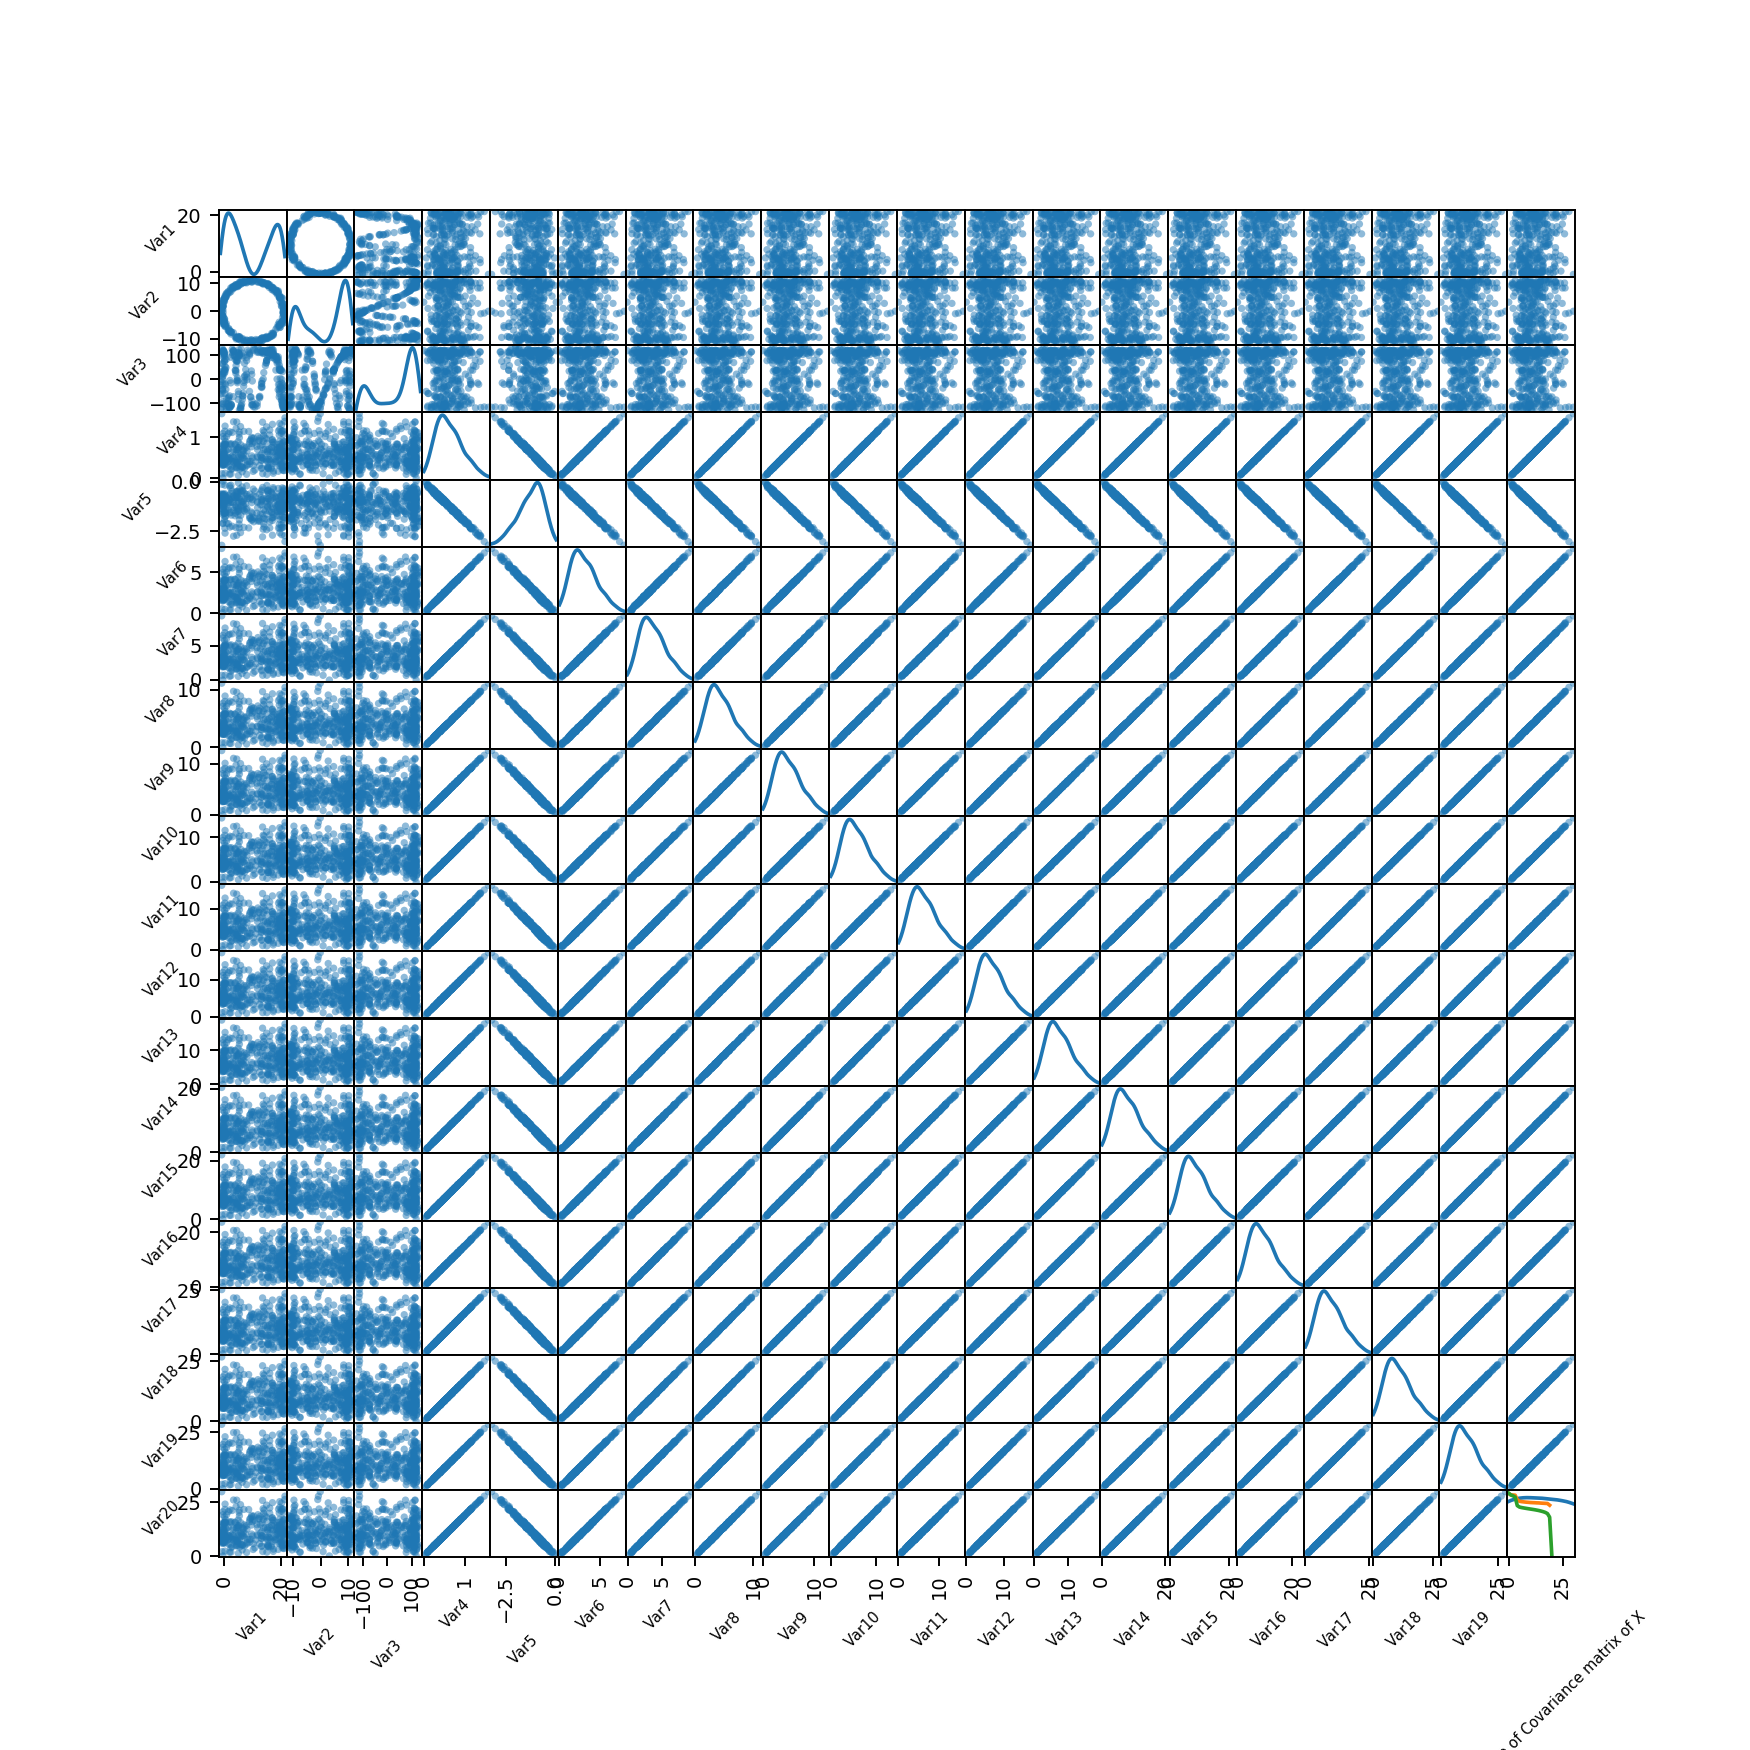

2021-10-20 01:12:21.500633  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 01:12:21.501390  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-10-20 01:12:21.501779  RUNNING-MSG PLoM: using ConfigTasks(task_list = FULL_TASK_LIST) to schedule a run. 
2021-10-20 01:12:21.502143  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 


In [4]:
# Filename
filename = './data/data_example20D.csv'
model = PLoM(model_name='Example0_constraints', data=filename, col_header=True, plot_tag=True)

In [5]:
model.add_constraints(constraints_file='./data/constraints_example20D.py')

2021-10-20 01:12:22.637669  RUNNING-MSG PLoM.add_constraints: constraints added. 


0

### Configuring tasks
Please specify tasks to run - the list of tasks can be run in sqeunce or invidivdual tasks can be run separately.

In [6]:
tasks = ['DataNormalization','RunPCA','RunKDE','ISDEGeneration']

### Step 0: Scaling the data

In [7]:
# Configure the task
model.ConfigTasks(['DataNormalization'])
# Launch the run
model.RunAlgorithm()

2021-10-20 01:12:22.762744  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-10-20 01:12:22.764346  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-10-20 01:12:22.806077  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-10-20 01:12:22.842044  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 


### Step 1: Principal Component Analysis (PCA)

2021-10-20 01:12:23.026686  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 
2021-10-20 01:12:23.032632  RUNNING-MSG PLoM.RunPCA: considered number of PCA components = 20 


<IPython.core.display.Javascript object>


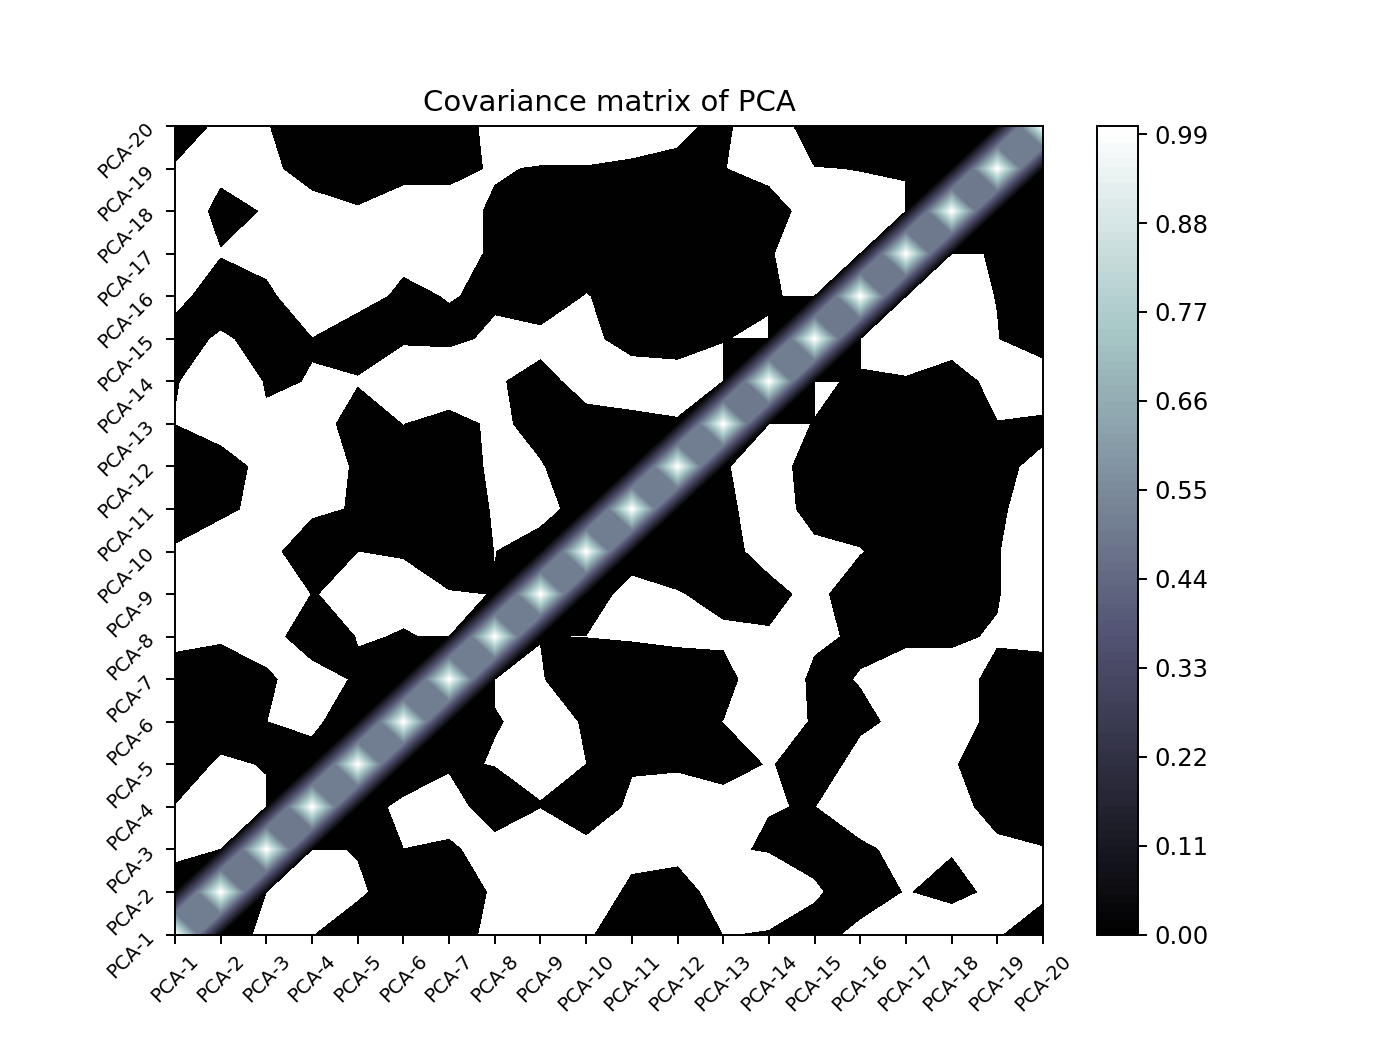

2021-10-20 01:12:24.188877  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 01:12:24.189594  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-10-20 01:12:24.229103  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-10-20 01:12:24.280215  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 


In [8]:
# Tolerance for truncating principal components
tol_pca = 1e-9
# Configure the task
model.ConfigTasks(['RunPCA'])
# Launch the run
model.RunAlgorithm(epsilon_pca=tol_pca,runDiffMaps=False)

### Step 2: Kernel Density Estimation (KDE)

In this step there is an optional argument for the RunAlgorithm process that involves the diffusion maps basis. This step can both be run or not, anddepending on the requirements it can be neglected. It can be noted that the default value of *runDiffMaps* is *True*.

2021-10-20 01:12:24.530389  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-10-20 01:12:25.106211  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-10-20 01:12:25.157605  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 


<IPython.core.display.Javascript object>


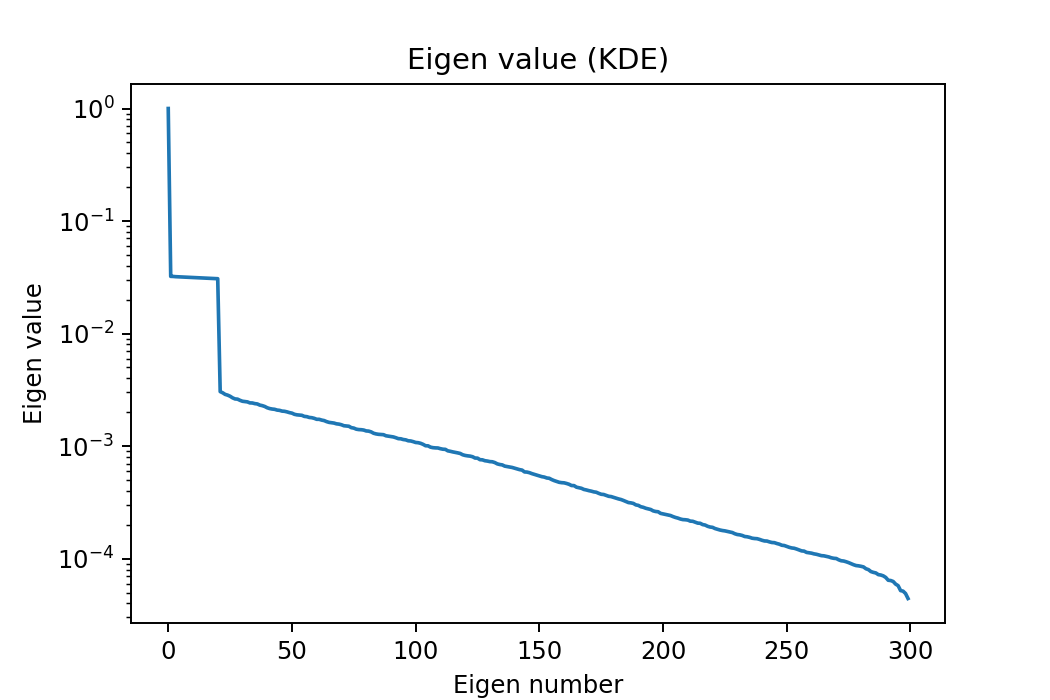

2021-10-20 01:12:25.870991  RUNNING-MSG PLoM: KDE_EigenValue.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 01:12:25.871659  RUNNING-MSG PLoM.RunAlgorithm: diffusion maps completed. 
2021-10-20 01:12:25.915438  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-10-20 01:12:26.112836  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 


In [9]:
# Smoothing parameter in the KDE
sp = 16
# Configure the task
model.ConfigTasks(['RunKDE'])

# Launch the run
model.RunAlgorithm(epsilon_kde=sp)

### Step 3: Create the generator

In [10]:
# Extra parameters for ISDE generation
new_sample_num_ratio = 10
tol_PCA2 = 1e-5
# Configure the task
model.ConfigTasks(['ISDEGeneration'])
# Launch the run
model.RunAlgorithm(n_mc = new_sample_num_ratio, tol_PCA2 = tol_PCA2)

2021-10-20 01:12:26.551086  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
2021-10-20 01:12:26.564795  RUNNING-MSG PLoM.ISDEGeneration: running iteration 1. 
delta t:  0.18616116359281468
2021-10-20 01:12:32.312175  RUNNING-MSG PLoM.ISDEGeneration: running iteration 2. 
delta t:  0.18616116359281468
2021-10-20 01:12:38.046276  RUNNING-MSG PLoM.ISDEGeneration: running iteration 3. 
delta t:  0.18616116359281468
2021-10-20 01:12:43.837928  RUNNING-MSG PLoM.ISDEGeneration: running iteration 4. 
delta t:  0.18616116359281468
2021-10-20 01:12:49.649100  RUNNING-MSG PLoM.ISDEGeneration: running iteration 5. 
delta t:  0.18616116359281468
2021-10-20 01:12:55.364580  RUNNING-MSG PLoM.ISDEGeneration: running iteration 6. 
delta t:  0.18616116359281468
2021-10-20 01:13:01.100211  RUNNING-MSG PLoM.ISDEGeneration: running iteration 7. 
delta t:  0.18616116359281468
2021-10-20 01:13:06.838678  RUNNING-MSG PLoM.ISDEGeneration: running iteration 8. 
delta t:

### Step 4: Exporting data

In [11]:
# Available data list
model.export_results()

2021-10-20 01:17:12.496275  RUNNING-MSG PLoM.export_results: available data /DS_EigenValue_PCA,/DS_EigenValues_KDE,/DS_EigenVector_PCA,/DS_Errors,/DS_KDE_Z,/DS_KDE_a,/DS_KDE_g,/DS_KDE_m,/DS_N,/DS_NumComp_PCA,/DS_X0,/DS_X_KDE,/DS_X_PCA,/DS_X_min,/DS_X_new,/DS_X_range,/DS_X_scaled,/DS_X_scaled_mean,/DS_c_v,/DS_hat_s_v,/DS_n,/DS_s_v,/EigenValue_PCA,/EigenValues_KDE,/EigenVector_PCA,/Errors,/KDE_Z,/KDE_a,/KDE_g,/KDE_m,/N,/NumComp_PCA,/X0,/X_KDE,/X_PCA,/X_min,/X_new,/X_range,/X_scaled,/X_scaled_mean,/basic,/c_v,/constraints_file,/hat_s_v,/n,/s_v. 


In [12]:
# Pick up the original and new realizations, X0 and X_new
model.export_results(data_list=['/X0','/X_new'], file_format_list=['csv','csv'])

2021-10-20 01:17:12.551682  RUNNING-MSG PLoM.export_results: /X0 is exported in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/DataOut/X0.csv. 
2021-10-20 01:17:12.624828  RUNNING-MSG PLoM.export_results: /X_new is exported in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/DataOut/X_new.csv. 


### Post-processing
We would like to check the basic statistics of the input sample (i.e., MSA) and the generated new realizations by PLoM. The key metrics include the median, standard deviation, and correlation coefficient matrix of different structural responses.

In [14]:
# Load results

#write realtive paths

df_initial = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X0.csv')
df_plom = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X_new.csv')
print(df_initial.head)
print(df_plom.head)

<bound method NDFrame.head of      Unnamed: 0       Var1       Var2        Var3      Var4      Var5  \
0             0  16.805187  -9.030051  127.664233  0.931982 -1.832991   
1             1  13.248262  10.235868  114.810444  0.431576 -0.902791   
2             2  15.471630   9.770788  121.172821  0.262776 -0.608559   
3             3  13.155974  -9.856282  -17.549627  0.230514 -0.474090   
4             4   5.083361   9.260483  -61.753186  0.746545 -1.491888   
..          ...        ...        ...         ...       ...       ...   
295         295  20.498631   1.915178  -40.365353  0.359852 -0.819206   
296         296  13.277776  10.478213  120.027958  0.601077 -1.168281   
297         297   2.276239   8.325455   91.974155  0.204629 -0.317934   
298         298   6.493595  10.436618  -70.223598  0.260169 -0.439710   
299         299  -0.817857   0.317960 -103.164885  0.490878 -0.890169   

         Var6      Var7      Var8      Var9  ...     Var11      Var12  \
0    4.642449  5.572

<IPython.core.display.Javascript object>


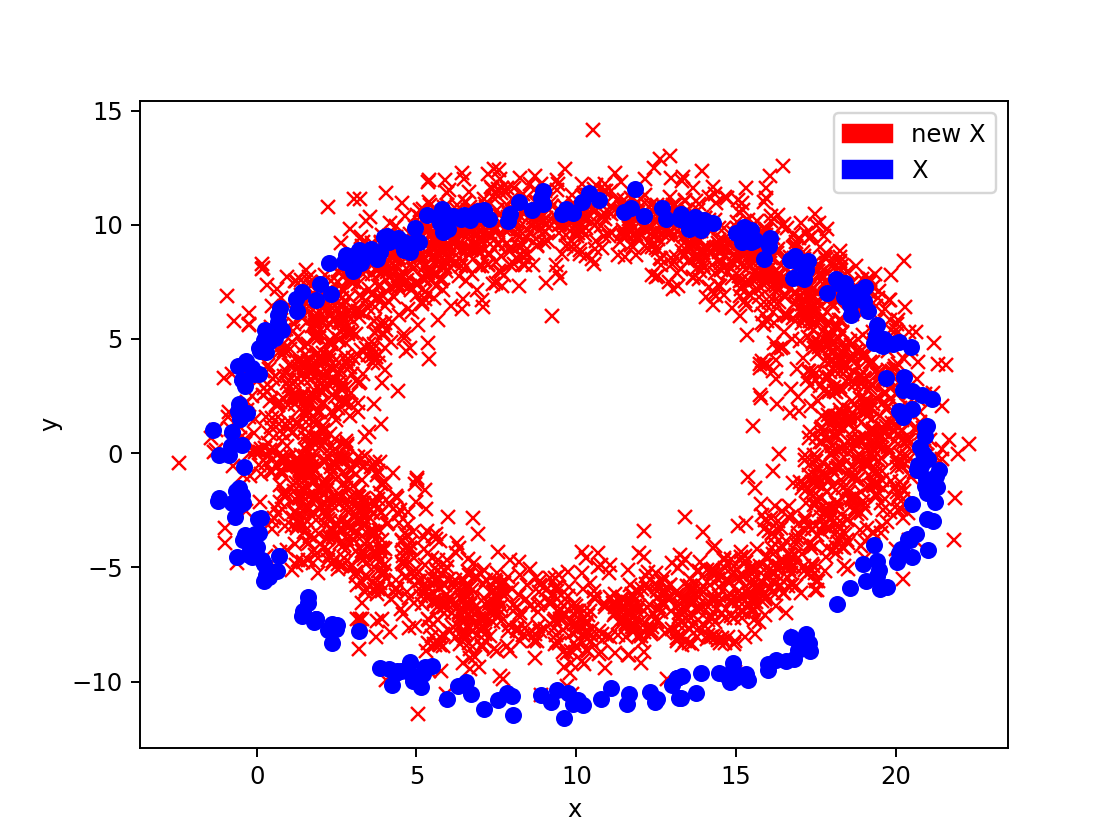

In [15]:
#plot of the first two variables
import matplotlib.patches as mpatches
plt.figure()
plt.plot(df_plom.iloc[:,1].to_numpy(), df_plom.iloc[:,2].to_numpy(), 'rx')
plt.plot(df_initial.iloc[:,1].to_numpy(), df_initial.iloc[:,2].to_numpy(), 'bo')
plt.xlabel('x')
plt.ylabel('y')
red_patch = mpatches.Patch(color='red', label='new X')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

<IPython.core.display.Javascript object>


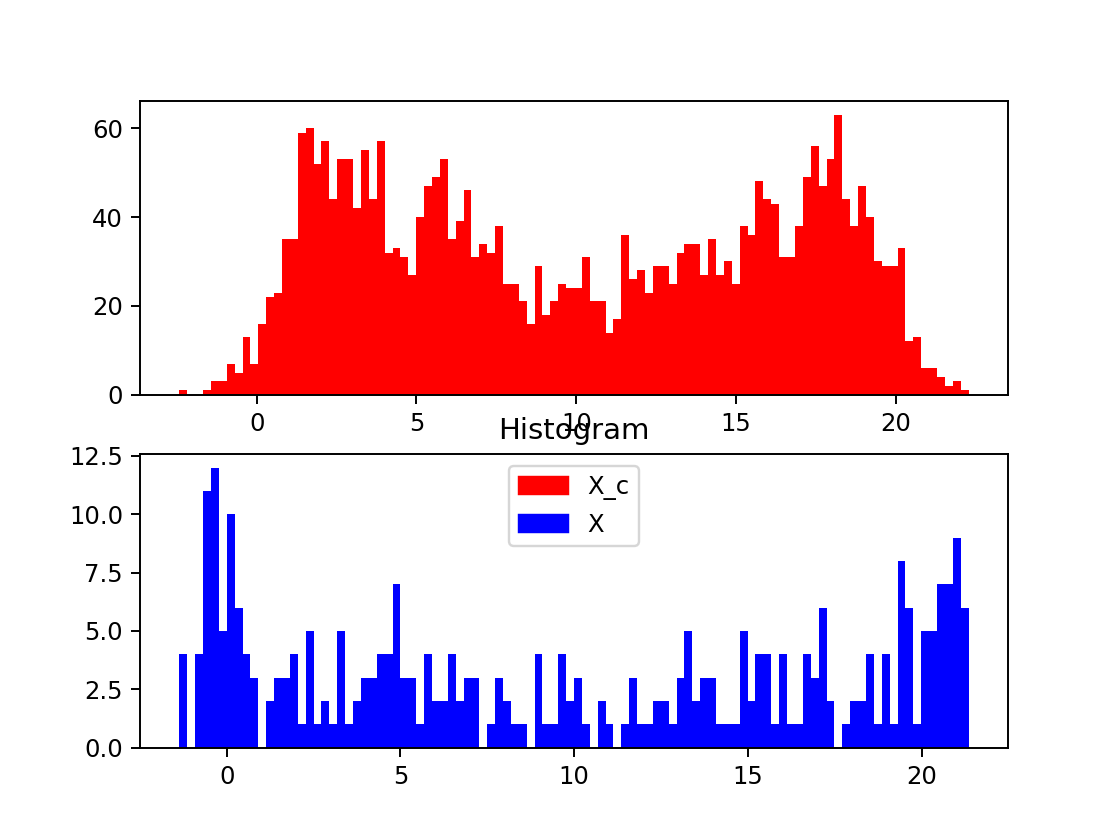

<IPython.core.display.Javascript object>


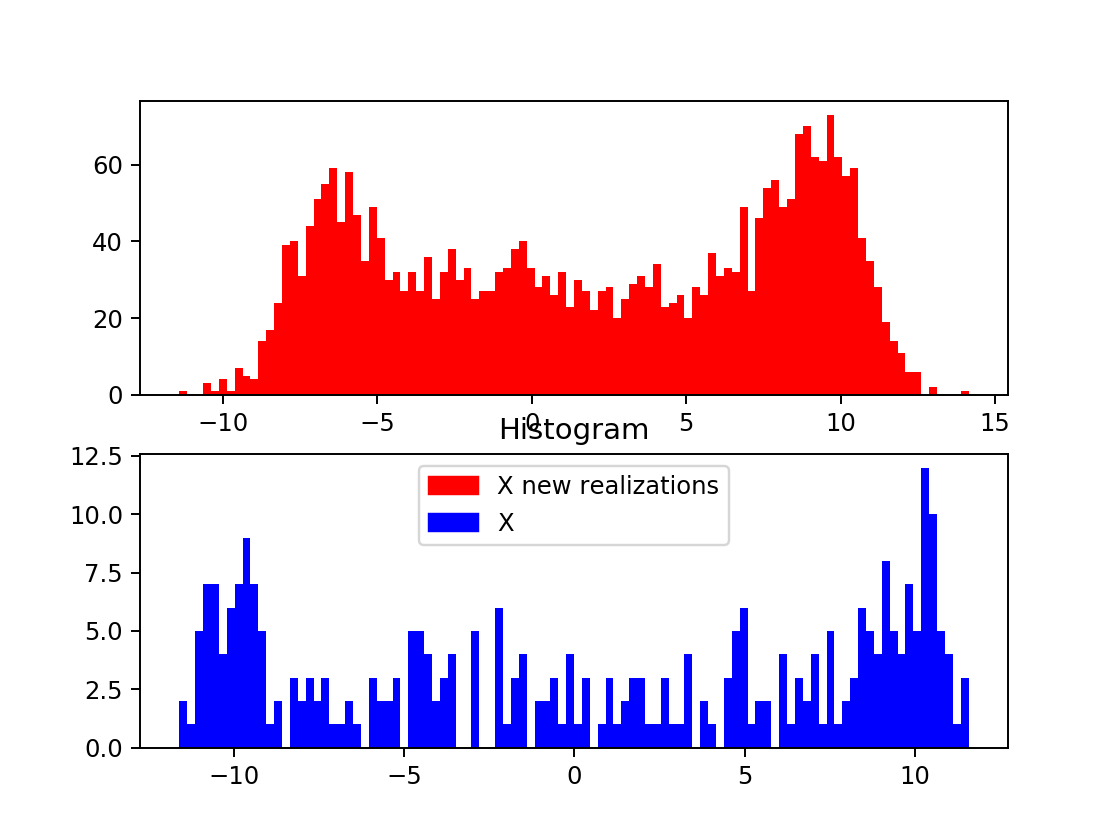

In [16]:
import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x1')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,1].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,1].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X_c')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x2')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,2].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,2].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X new realizations')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()